# 🧠 Projet Deep Learning — Classification des Cellules Sanguines Cancéreuses (PyTorch)

## 📌 1. Contexte du Projet
Vous êtes un développeur IA junior au sein d’un laboratoire biomédical spécialisé en imagerie médicale.
Objectif : Automatiser l’analyse d’images médicales liées à deux pathologies critiques :
- Détection de **tumeurs cérébrales** (object detection à partir d’IRM),
- Classification de **cellules sanguines cancéreuses** (leucémies) à partir de frottis sanguins.

Cette première partie se concentre sur la **classification des cellules sanguines cancéreuses avec PyTorch**.

## 🧾 2. Importation des Bibliothèques Nécessaires


In [1]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 📂 3. Chargement des Images & Vérification des Extensions

- Extensions autorisées : `.jpeg`, `.jpg`, `.png`, `.bmp`
- Suppression des fichiers invalides
- Gestion des erreurs via `try-except`

In [2]:
data_dir = "../Data/Raw/Blood cell Cancer [ALL]"

valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

# Parcourir tous les sous-dossiers (glioma, meningioma, etc.)
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            ext = os.path.splitext(file)[1].lower()  # extraire l’extension
            
            if ext not in valid_extensions:
                os.remove(file_path)
                print(f" Fichier supprimé : {file_path}")
            else:
                print(f" Fichier avec extension valide : {file_path}")
print(" Suppression terminée.")

 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (1).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (10).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (11).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (12).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (13).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (14).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (15).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (16).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (17).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Benign\Sap_013 (18).jpg
 Fichier avec extension valide : ../Data/Raw/Blood cell Cancer [ALL]\Be

## 🔎 4. Exploration des Classes du Dataset
- Liste des dossiers (classes)
- Nombre d’images par classe (`countplot`)
- Affichage d’un échantillon d’images par classe

Classe Benign : 512 images
Classe early Pre-B : 979 images
Classe Pre-B : 955 images
Classe Pro-B : 796 images


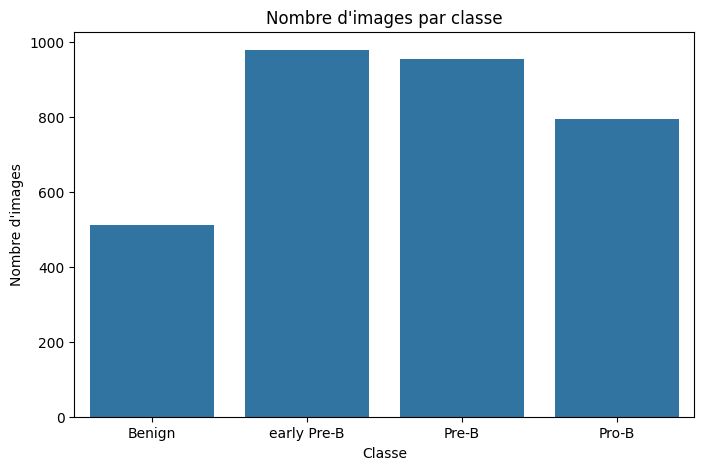

['Benign', 'Pre-B', 'Pro-B', 'early Pre-B']


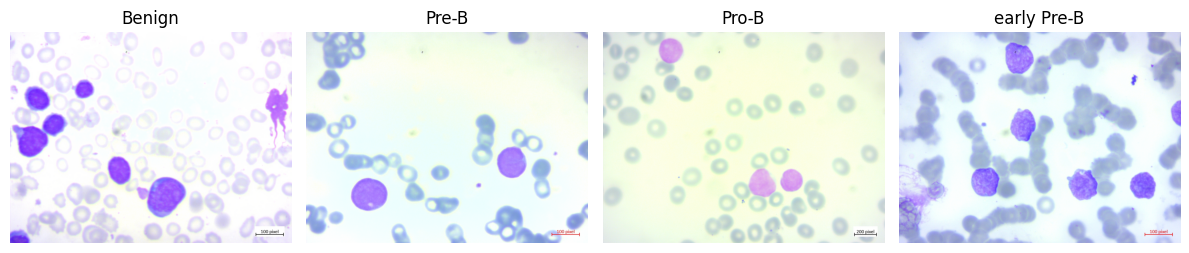

In [3]:
# Nbre d'image par classe :
labels=[]
images=[]
for folder in os.listdir(data_dir):
    folder_path=os.path.join(data_dir,folder)
    if os.path.isdir(folder_path):
        count=0
        for file in os.listdir(folder_path):
            if file.lower().endswith(valid_extensions):
                count+=1
                images.append(os.path.join(folder_path, file))
                labels.append(folder)
        print(f"Classe {folder} : {count} images")
print

# affichage de nombre image par classe countplot 

plt.figure(figsize=(8,5))
sns.countplot(x=labels)
plt.title("Nombre d'images par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d'images")
plt.show()

# Afficher les images par classe 

classes = sorted(set(labels))
print(classes)

plt.figure(figsize=(12, 6))

for i, cls in enumerate(classes):
    # Trouver le premier chemin d'image appartenant à cette classe
    for img_path, label in zip(images, labels):
        if label == cls:
            img = Image.open(img_path)
            plt.subplot(1, len(classes), i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
            break  # on s'arrête après la première image trouvée

plt.tight_layout()
plt.show()





## ✂️ 5. Division du Dataset en **Train / Validation / Test**
- Répartition : **70% / 15% / 15%**
- Vérification du nombre d’images par dossier

In [4]:
import splitfolders

input_folder = "../Data/Raw/Blood cell Cancer [ALL]"
output_folder = "../Data/Processed"

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.7, 0.15, 0.15),
    group_prefix=None,
    move=False 
)

print("Division des données terminée avec split-folders!")

train_path = os.path.join(output_folder, "train")
val_path = os.path.join(output_folder, "val")
test_path = os.path.join(output_folder, "test")

print("\nRépartition par classe :")
for dataset_name, dataset_path in [("Train", train_path), ("Validation", val_path), ("Test", test_path)]:
    print(f"\n{dataset_name}:")
    if os.path.exists(dataset_path):
        classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
        for class_name in sorted(classes):
            class_path = os.path.join(dataset_path, class_name)
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
            print(f"   - {class_name}: {num_images} images")


Copying files: 3242 files [00:02, 1116.47 files/s]

Division des données terminée avec split-folders!

Répartition par classe :

Train:
   - Benign: 358 images
   - Pre-B: 668 images
   - Pro-B: 557 images
   - early Pre-B: 685 images

Validation:
   - Benign: 76 images
   - Pre-B: 143 images
   - Pro-B: 119 images
   - early Pre-B: 146 images

Test:
   - Benign: 78 images
   - Pre-B: 144 images
   - Pro-B: 120 images
   - early Pre-B: 148 images


## 🔄 6. Data Augmentation (Seulement sur Train)
- Transformations : `blur`, `noise`, `flip`
- Objectif : équilibrer les classes et augmenter la robustesse


In [5]:
from PIL import Image, ImageFilter
import numpy as np
import random

train_path = "../Data/Processed/train"

def add_noise(img, noise_level=20):
    arr = np.array(img)
    noise = np.random.randint(-noise_level, noise_level, arr.shape, dtype='int16')
    noisy_arr = np.clip(arr.astype('int16') + noise, 0, 255).astype('uint8')
    return Image.fromarray(noisy_arr)

def augment_image(img_path, save_dir, suffix):
    """Apply combined augmentation (blur + noise + flip) and save with suffix"""
    img = Image.open(img_path)
    base_name = os.path.splitext(os.path.basename(img_path))[0]
    ext = os.path.splitext(img_path)[1]
    
    blurred = img.filter(ImageFilter.GaussianBlur(radius=2))
    noisy = add_noise(blurred)
    flipped = noisy.transpose(Image.FLIP_LEFT_RIGHT)
    
    new_name = f"{base_name}_aug{suffix}{ext}"
    flipped.save(os.path.join(save_dir, new_name))
    
    return 1

TARGET_COUNT = 688

print("Starting augmentation to balance classes to 688 images each...")

for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    
    all_images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
    original_images = [f for f in all_images if '_aug' not in f and '_dup' not in f and '_flip' not in f]
    
    current_count = len(all_images)
    print(f"\n Class '{class_name}':")
    print(f"   Current: {current_count} images")
    print(f"   Target: {TARGET_COUNT} images")
    
    if current_count >= TARGET_COUNT:
        print(f"    Already at or above target")
        continue
    
    needed = TARGET_COUNT - current_count
    print(f"  Need to add: {needed} augmented images")
    
    aug_counter = 0
    while current_count < TARGET_COUNT:
        img_file = original_images[aug_counter % len(original_images)]
        img_path = os.path.join(class_dir, img_file)
        
        augment_image(img_path, class_dir, aug_counter)
        
        aug_counter += 1
        current_count += 1
    
    print(f"    Created {aug_counter} augmented images")

print("\n Augmentation completed!")

print("\n Final Distribution:")
for class_name in sorted(os.listdir(train_path)):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
        print(f"   - {class_name}: {count} images")


Starting augmentation to balance classes to 688 images each...

 Class 'Benign':
   Current: 358 images
   Target: 688 images
  Need to add: 330 augmented images
    Created 330 augmented images

 Class 'early Pre-B':
   Current: 685 images
   Target: 688 images
  Need to add: 3 augmented images
    Created 3 augmented images

 Class 'Pre-B':
   Current: 668 images
   Target: 688 images
  Need to add: 20 augmented images
    Created 20 augmented images

 Class 'Pro-B':
   Current: 557 images
   Target: 688 images
  Need to add: 131 augmented images
    Created 131 augmented images

 Augmentation completed!

 Final Distribution:
   - Benign: 688 images
   - Pre-B: 688 images
   - Pro-B: 688 images
   - early Pre-B: 688 images


In [6]:
# Mettre à jour les chemins (split-folders crée train/val/test en minuscules)
train_path = "../Data/Processed/train"
val_path = "../Data/Processed/val"
test_path = "../Data/Processed/test"

for dataset_name, dataset_path in [("Train", train_path), ("Validation", val_path), ("Test", test_path)]:
    print(f"\n{dataset_name}:")
    if os.path.exists(dataset_path):
        classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
        for class_name in sorted(classes):
            class_path = os.path.join(dataset_path, class_name)
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))])
            print(f"   - {class_name}: {num_images} images")



Train:
   - Benign: 688 images
   - Pre-B: 688 images
   - Pro-B: 688 images
   - early Pre-B: 688 images

Validation:
   - Benign: 76 images
   - Pre-B: 143 images
   - Pro-B: 119 images
   - early Pre-B: 146 images

Test:
   - Benign: 78 images
   - Pre-B: 144 images
   - Pro-B: 120 images
   - early Pre-B: 148 images


## 🧪 7. Préparation des Données avec `ImageFolder` & `Transforms`
- Resize
- ToTensor
- Normalize

In [7]:
from torchvision import datasets,transforms

# Chemins de train/test/validation (split-folders utilise des noms en minuscules)
train_dir = "../Data/Processed/train"
test_dir = "../Data/Processed/test"
validation_dir = "../Data/Processed/val"

# Definition de transformer :
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], # Normaliser (R, G, B)
                         std=[0.5, 0.5, 0.5])
])

# Charger les datasets avec ImageFolder
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
validation_dataset   = datasets.ImageFolder(root=validation_dir, transform=transform)
test_dataset  = datasets.ImageFolder(root=test_dir, transform=transform)

# Vérification
print("Nombre d'images dans le train :", len(train_dataset))
print("Nombre d'images dans la validation :", len(validation_dataset))
print("Nombre d'images dans le test :", len(test_dataset))
print("Classes :", train_dataset.classes)


Nombre d'images dans le train : 2752
Nombre d'images dans la validation : 484
Nombre d'images dans le test : 490
Classes : ['Benign', 'Pre-B', 'Pro-B', 'early Pre-B']


## 🚚 8. Création des DataLoaders
- Batch loading
- Shuffling

In [8]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset: {len(train_dataset)} images")
print(f"Validation dataset: {len(validation_dataset)} images")
print(f"Test dataset: {len(test_dataset)} images")
print(f"Classes: {train_dataset.classes}")



Train dataset: 2752 images
Validation dataset: 484 images
Test dataset: 490 images
Classes: ['Benign', 'Pre-B', 'Pro-B', 'early Pre-B']


## 🧠 9. Chargement du Modèle Pré-entraîné **GoogLeNet**
- Remplacement de la partie **Fully Connected (FC)** par un `nn.Sequential`

In [9]:
import torch
import torch.nn as nn
from torchvision import models

# Nombre de classes
num_classes = len(train_dataset.classes)

# Charger le modèle pré-entraîné
model = models.googlenet(pretrained=True)

# Geler les couches convolutives
for param in model.parameters():
    param.requires_grad = False

# Remplacer la couche fully connected
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, num_classes),
)

print("Modèle prêt sur CPU")


Modèle prêt sur CPU


c:\Users\elabi\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\elabi\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## ⚙️ 10. Configuration de l’Entraînement
- Learning Rate
- Loss Function
- Optimizer

In [10]:
import torch.optim as optim

learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)


## 🏋️ 11. Boucle d’Entraînement

In [11]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


In [12]:
from tqdm.notebook import tqdm

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss = running_loss / total
    train_acc = correct / total
    
    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_loss / val_total
    val_acc = val_correct / val_total
    
    # Stocker les valeurs
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 1/10 | Train Loss: 0.5824, Train Acc: 0.7809 | Val Loss: 0.2462, Val Acc: 0.9132


Epoch 2/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 2/10 | Train Loss: 0.2334, Train Acc: 0.9175 | Val Loss: 0.1430, Val Acc: 0.9525


Epoch 3/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 3/10 | Train Loss: 0.2021, Train Acc: 0.9324 | Val Loss: 0.1770, Val Acc: 0.9483


Epoch 4/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 4/10 | Train Loss: 0.1776, Train Acc: 0.9335 | Val Loss: 0.1224, Val Acc: 0.9628


Epoch 5/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 5/10 | Train Loss: 0.1878, Train Acc: 0.9284 | Val Loss: 0.1270, Val Acc: 0.9587


Epoch 6/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 6/10 | Train Loss: 0.1619, Train Acc: 0.9448 | Val Loss: 0.1159, Val Acc: 0.9607


Epoch 7/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 7/10 | Train Loss: 0.1355, Train Acc: 0.9517 | Val Loss: 0.1008, Val Acc: 0.9607


Epoch 8/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 8/10 | Train Loss: 0.1974, Train Acc: 0.9320 | Val Loss: 0.1105, Val Acc: 0.9587


Epoch 9/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 9/10 | Train Loss: 0.1293, Train Acc: 0.9546 | Val Loss: 0.1350, Val Acc: 0.9442


Epoch 10/10 [Train]:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 10/10 | Train Loss: 0.1343, Train Acc: 0.9509 | Val Loss: 0.1183, Val Acc: 0.9566



## 📊 12. Évaluation & Test du Modèle
- Accuracy / Loss
- Matrice de confusion (optionnel)

Accuracy sur le test set : 0.9714
Matrice de confusion :
 [[ 71   2   0   5]
 [  0 142   0   2]
 [  0   1 119   0]
 [  3   1   0 144]]


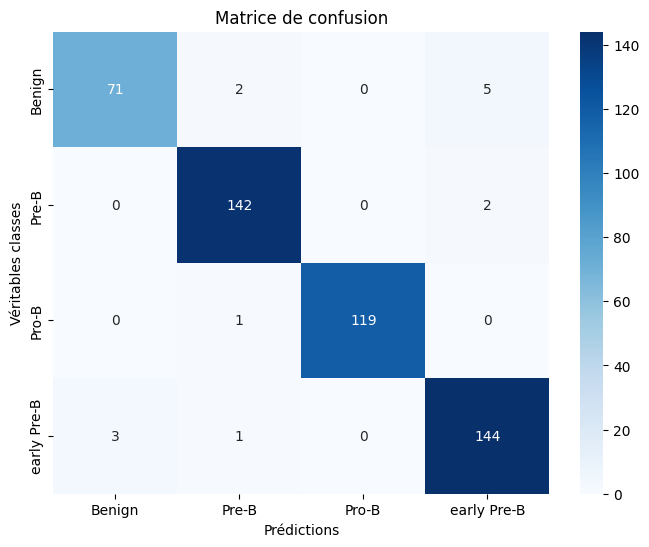

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.tolist())
        all_preds.extend(predicted.tolist())

# Calculer l'accuracy
test_acc = sum([a==b for a,b in zip(all_labels, all_preds)]) / len(all_labels)
print(f"Accuracy sur le test set : {test_acc:.4f}")

cm = confusion_matrix(all_labels, all_preds)
print("Matrice de confusion :\n", cm)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Prédictions")
plt.ylabel("Véritables classes")
plt.title("Matrice de confusion")
plt.show()


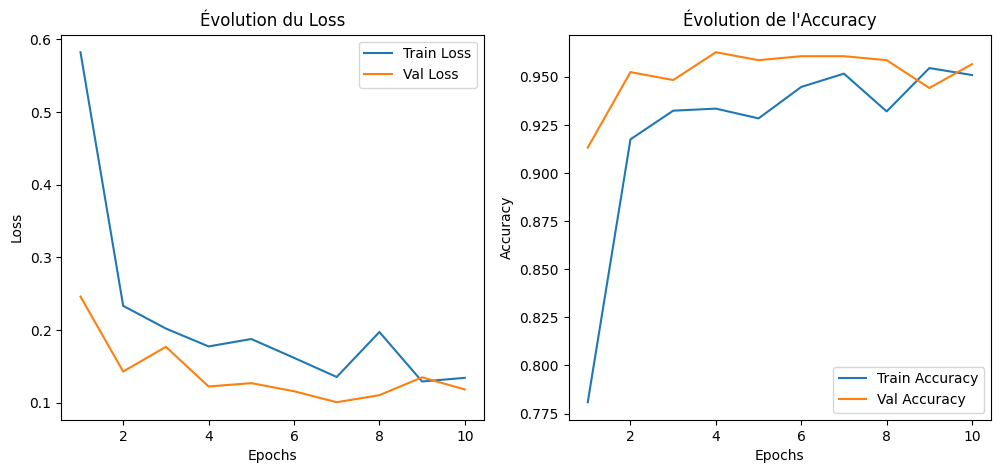

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs+1)

# Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Évolution du Loss")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, label="Train Accuracy")
plt.plot(epochs, val_accuracies, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Évolution de l'Accuracy")
plt.legend()

plt.show()


## 💾 13. Sauvegarde du Modèle

In [15]:
torch.save(model, "../models/googlenet_complete.pt")

## ✅ 14. Conclusion & Observations
